In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import collections

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
file_chat = open("plot_data_bleu_4","r")

sentence = file_chat.readline()
data = collections.defaultdict(list)
while sentence:
    sen = sentence.split(" ")
    data[sen[0]].append(float(sen[1])*100)
    sentence = file_chat.readline()

file_chat.close()

In [3]:
plot_map = dict()

for key, value in data.items():
    plot_map[int(key)] = np.mean(value)



In [5]:
file_chat2 = open("plot_data_bleu_2","r")

sentence2 = file_chat2.readline()
data2 = collections.defaultdict(list)
while sentence2:
    sen = sentence2.split(" ")
    data2[sen[0]].append(float(sen[1])*100)
    sentence2 = file_chat2.readline()

file_chat2.close()

plot_map2 = dict()

for key, value in data2.items():
    plot_map2[int(key)] = np.mean(value)



In [6]:
low = 10
high = 100
kv_data = sorted(plot_map.items(),key=lambda x:x[0])
iterations = [k for k,v in kv_data if low <=k<=high]
plot_data =[v for k,v in kv_data if low <=k<=high]

kv_data2 = sorted(plot_map2.items(),key=lambda x:x[0])
iterations2 = [k for k,v in kv_data2 if low <=k<=high]
plot_data2 =[v for k,v in kv_data2 if low <=k<=high]

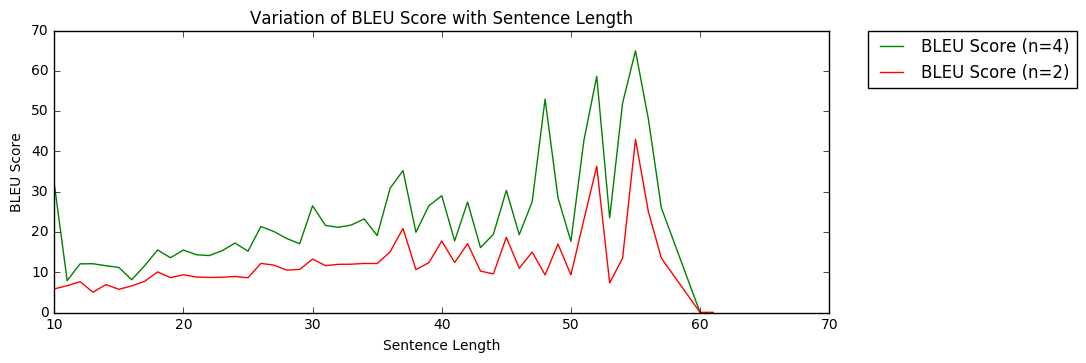

In [9]:
plt.subplot(2, 1, 1)
plt.plot(iterations[:50],plot_data[:50],"g",label="BLEU Score (n=4)")
plt.plot(iterations2[:50],plot_data2[:50],"r",label="BLEU Score (n=2)")
plt.title('Variation of BLEU Score with Sentence Length')
plt.xlabel('Sentence Length')
plt.ylabel('BLEU Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)